# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [65]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np
from palmerpenguins import load_penguins
import plotnine as p9


In [30]:
penguins = load_penguins()

In [31]:
dat = pd.get_dummies(penguins)
dat

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,39.1,18.7,181.0,3750.0,2007,True,False,False,False,False,True,False,True
1,39.5,17.4,186.0,3800.0,2007,True,False,False,False,False,True,True,False
2,40.3,18.0,195.0,3250.0,2007,True,False,False,False,False,True,True,False
3,NaN,NaN,NaN,NaN,2007,True,False,False,False,False,True,False,False
4,36.7,19.3,193.0,3450.0,2007,True,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2009,False,True,False,False,True,False,False,True
340,43.5,18.1,202.0,3400.0,2009,False,True,False,False,True,False,True,False
341,49.6,18.2,193.0,3775.0,2009,False,True,False,False,True,False,False,True
342,50.8,19.0,210.0,4100.0,2009,False,True,False,False,True,False,False,True


In [32]:
enc = OneHotEncoder(handle_unknown='ignore')

enc_fitted = enc.fit(penguins[['species']])
enc_fitted.transform(penguins[['species']]).todense()

matrix([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        ...,
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.]])

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler_fitted = scaler.fit(penguins[['bill_length_mm']])
#This is normalize
scaler_fitted.transform(penguins[['bill_length_mm']])

array([[-0.88449874],
       [-0.81112573],
       [-0.66437972],
       [        nan],
       [-1.32473679],
       [-0.84781224],
       [-0.92118525],
       [-0.86615549],
       [-1.80166135],
       [-0.35254443],
       [-1.12296102],
       [-1.12296102],
       [-0.5176337 ],
       [-0.976215  ],
       [-1.70994508],
       [-1.34308004],
       [-0.95787175],
       [-0.26082817],
       [-1.74663159],
       [ 0.38118565],
       [-1.12296102],
       [-1.14130427],
       [-1.47148281],
       [-1.04958801],
       [-0.9395285 ],
       [-1.58154232],
       [-0.60934996],
       [-0.62769321],
       [-1.10461777],
       [-0.62769321],
       [-0.81112573],
       [-1.23302053],
       [-0.81112573],
       [-0.5543202 ],
       [-1.37976655],
       [-0.86615549],
       [-0.9395285 ],
       [-0.31585793],
       [-1.15964752],
       [-0.75609598],
       [-1.3614233 ],
       [-0.57266346],
       [-1.45313956],
       [ 0.03266386],
       [-1.26970704],
       [-0

Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

/opt/anaconda3/lib/python3.13/site-packages/plotnine/guides/guides.py:211: PlotnineWarning: Cannot generate legend for the 'size' aesthetic. Make sure you have mapped a variable to it


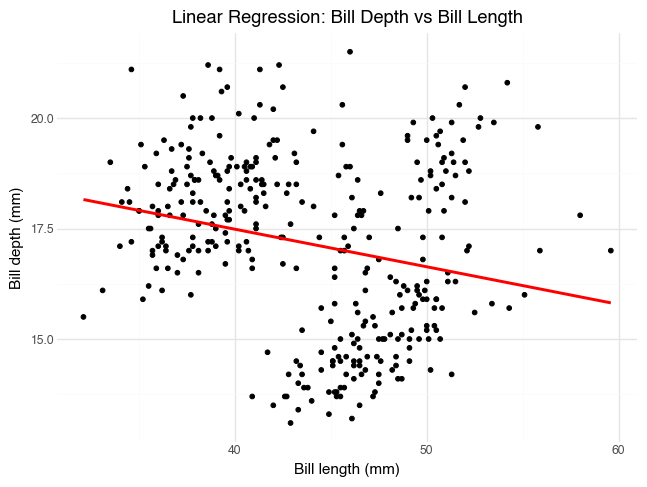

In [67]:
# Simple linear regression (e.g. straight-line) model
dat = penguins[['bill_length_mm', 'bill_depth_mm']].dropna().copy()

X = dat[['bill_length_mm']]
y = dat['bill_depth_mm']

lr = LinearRegression()
lr_fitted = lr.fit(X, y)

dat['y_pred'] = lr_fitted.predict(X)
dat = dat.sort_values('bill_length_mm')

plot = (
    p9.ggplot(dat, p9.aes(x='bill_length_mm', y='bill_depth_mm'))
    + p9.geom_point(shape='o', color='black', stroke=0.4, alpha=1)
    + p9.geom_line(p9.aes(y='y_pred'), color='red', size=1.2)
    + p9.scale_size(range=(1, 20))
    + p9.labs(
        title='Linear Regression: Bill Depth vs Bill Length',
        x='Bill length (mm)',
        y='Bill depth (mm)'
    )
    + p9.theme_minimal()
)

plot


/opt/anaconda3/lib/python3.13/site-packages/plotnine/guides/guides.py:211: PlotnineWarning: Cannot generate legend for the 'size' aesthetic. Make sure you have mapped a variable to it


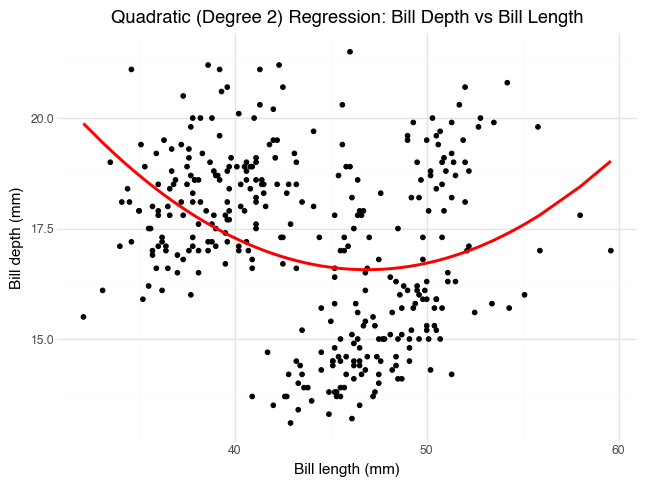

In [69]:
# Quadratic (degree 2 polynomial) model
dat = dat[['bill_length_mm', 'bill_depth_mm']].dropna().copy()

dat['x_sq'] = dat['bill_length_mm'] ** 2
X = dat[['bill_length_mm', 'x_sq']]
y = dat['bill_depth_mm']

lr = LinearRegression()
lr_fitted = lr.fit(X, y)

dat['y_pred'] = lr_fitted.predict(X)
dat = dat.sort_values('bill_length_mm')

plot = (
    p9.ggplot(dat, p9.aes(x='bill_length_mm', y='bill_depth_mm'))
    + p9.geom_point(shape='o', color='black', stroke=0.4, alpha=1)
    + p9.geom_line(p9.aes(y='y_pred'), color='red', size=1.2)
    + p9.scale_size(range=(1, 20))
    + p9.labs(
        title='Quadratic (Degree 2) Regression: Bill Depth vs Bill Length',
        x='Bill length (mm)',
        y='Bill depth (mm)'
    )
    + p9.theme_minimal()
)

plot


/opt/anaconda3/lib/python3.13/site-packages/plotnine/guides/guides.py:211: PlotnineWarning: Cannot generate legend for the 'size' aesthetic. Make sure you have mapped a variable to it


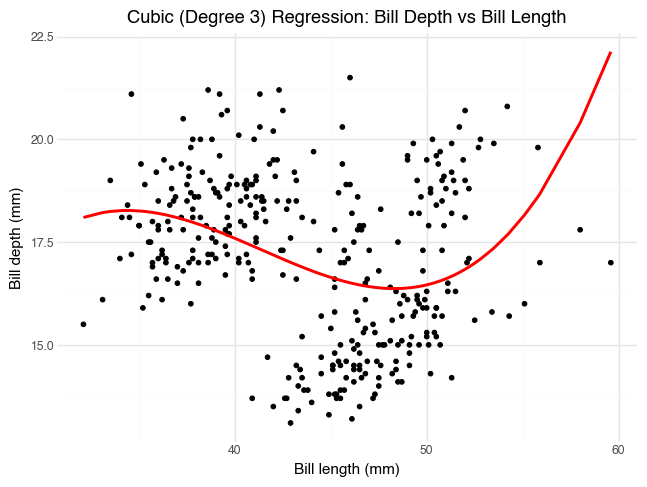

In [70]:
# Cubic (degree 3 polynomial) model
dat = dat[['bill_length_mm', 'bill_depth_mm']].dropna().copy()

dat['x_sq'] = dat['bill_length_mm'] ** 2
dat['x_cube'] = dat['bill_length_mm'] ** 3
X = dat[['bill_length_mm', 'x_sq', 'x_cube']]
y = dat['bill_depth_mm']

lr = LinearRegression()
lr_fitted = lr.fit(X, y)

dat['y_pred'] = lr_fitted.predict(X)
dat = dat.sort_values('bill_length_mm')

plot = (
    p9.ggplot(dat, p9.aes(x='bill_length_mm', y='bill_depth_mm'))
    + p9.geom_point(shape='o', color='black', stroke=0.4, alpha=1)
    + p9.geom_line(p9.aes(y='y_pred'), color='red', size=1.2)
    + p9.scale_size(range=(1, 20))
    + p9.labs(
        title='Cubic (Degree 3) Regression: Bill Depth vs Bill Length',
        x='Bill length (mm)',
        y='Bill depth (mm)'
    )
    + p9.theme_minimal()
)

plot

/opt/anaconda3/lib/python3.13/site-packages/plotnine/guides/guides.py:211: PlotnineWarning: Cannot generate legend for the 'size' aesthetic. Make sure you have mapped a variable to it


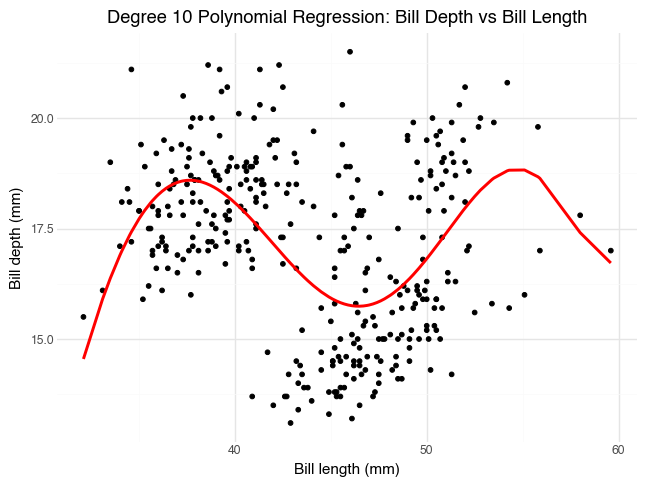

In [71]:
# Degree 10 polynomial model
dat = penguins[['bill_length_mm', 'bill_depth_mm']].dropna().copy()
dat = dat[['bill_length_mm', 'bill_depth_mm']].dropna().copy()

dat["x_sq"]   = dat["bill_length_mm"]**2
dat["x_cube"] = dat["bill_length_mm"]**3
dat["x_4"]    = dat["bill_length_mm"]**4
dat["x_5"]    = dat["bill_length_mm"]**5
dat["x_6"]    = dat["bill_length_mm"]**6
dat["x_7"]    = dat["bill_length_mm"]**7
dat["x_8"]    = dat["bill_length_mm"]**8
dat["x_9"]    = dat["bill_length_mm"]**9
dat["x_10"]   = dat["bill_length_mm"]**10

X = dat[['bill_length_mm',
         'x_sq',
         'x_cube',
         'x_4',
         'x_5',
         'x_6',
         'x_7',
         'x_8',
         'x_9',
         'x_10']]
y = dat['bill_depth_mm']

lr = LinearRegression()
lr_fitted = lr.fit(X, y)

dat['y_pred'] = lr_fitted.predict(X)
dat = dat.sort_values('bill_length_mm')

plot = (
    p9.ggplot(dat, p9.aes(x='bill_length_mm', y='bill_depth_mm'))
    + p9.geom_point(shape='o', color='black', stroke=0.4, alpha=1)
    + p9.geom_line(p9.aes(y='y_pred'), color='red', size=1.2)
    + p9.scale_size(range=(1, 20))
    + p9.labs(
        title='Degree 10 Polynomial Regression: Bill Depth vs Bill Length',
        x='Bill length (mm)',
        y='Bill depth (mm)'
    )
    + p9.theme_minimal()
)

plot

* Are any of the models above underfitting the data? If so, which ones and how can you tell?
    I think all models are underfitting the data but linear is the worst because it does not in anyway flow with the data
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
    I dont think anything is overfitting given how all over the place this data is
* Which of the above models do you think fits the data best and why?
    Degree 10 seems to flow with the data the best even then not that well